Objekte: Hier finden Sie historische Objekete des Badischen Landmuseums.

Wikidata link: [http://www.wikidata.org/entity/Q119522250](http://www.wikidata.org/entity/Q119522250)

Title: Gusskuchen

Creator: Perspectives on changes in early Roman Gaul

Copyright: Creative Commons

Image URL: http://commons.wikimedia.org/wiki/Special:FilePath/Gusskuchen.png



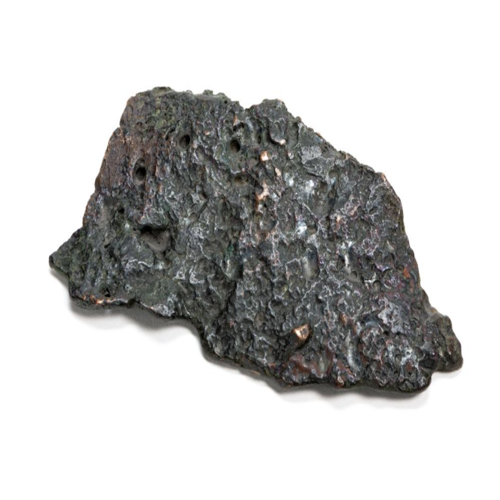




Wikidata link: [http://www.wikidata.org/entity/Q119522250](http://www.wikidata.org/entity/Q119522250)

Title: Gusskuchen

Creator: Peter Gaul

Copyright: Creative Commons

Image URL: http://commons.wikimedia.org/wiki/Special:FilePath/Gusskuchen.png



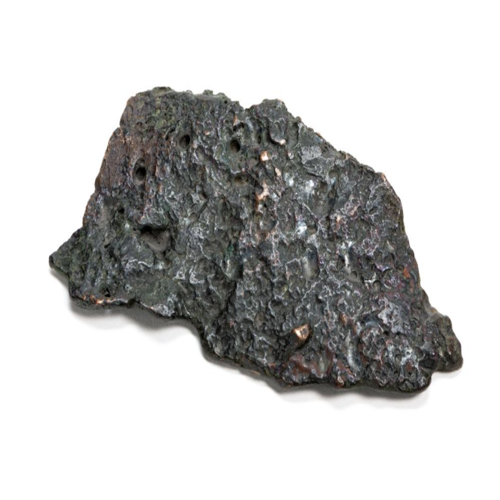




Wikidata link: [http://www.wikidata.org/entity/Q119522251](http://www.wikidata.org/entity/Q119522251)

Title: Messer

Creator: Perspectives on changes in early Roman Gaul

Copyright: Creative Commons

Image URL: http://commons.wikimedia.org/wiki/Special:FilePath/Griffdornmesser.png



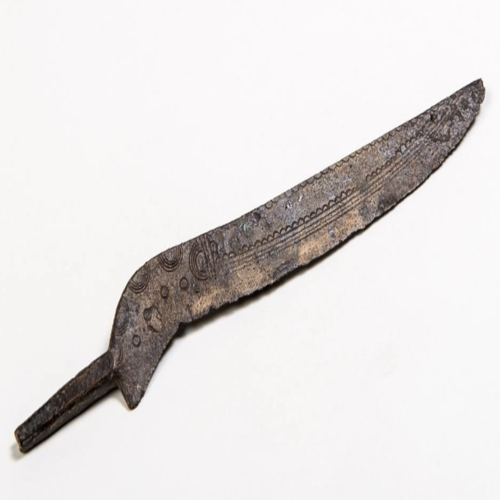




Wikidata link: [http://www.wikidata.org/entity/Q119522251](http://www.wikidata.org/entity/Q119522251)

Title: Messer

Creator: Peter Gaul

Copyright: Creative Commons

Image URL: http://commons.wikimedia.org/wiki/Special:FilePath/Griffdornmesser.png



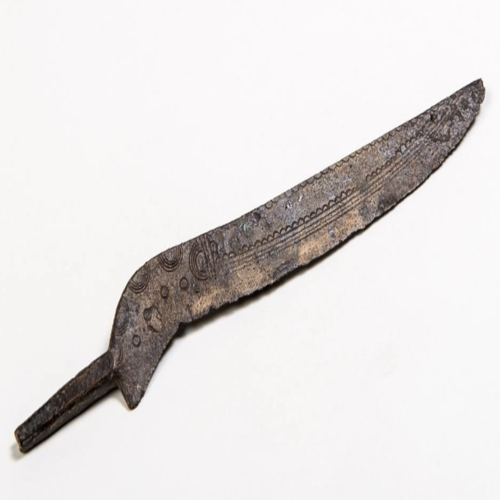




Wikidata link: [http://www.wikidata.org/entity/Q119522252](http://www.wikidata.org/entity/Q119522252)

Title: Lanzenspitze

Creator: Peter Gaul

Copyright: Creative Commons

Image URL: http://commons.wikimedia.org/wiki/Special:FilePath/T%C3%BCllenlanzenspitze.png



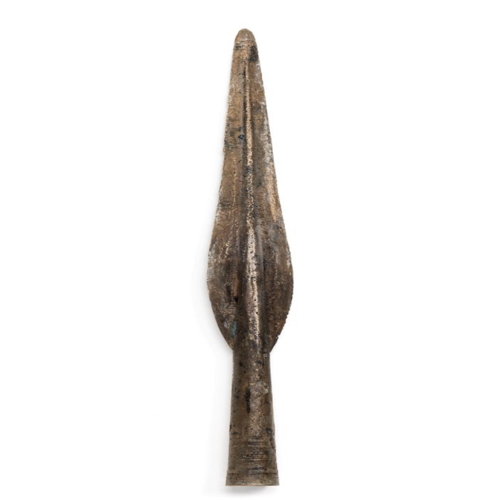

In [11]:
from SPARQLWrapper import SPARQLWrapper, JSON
from PIL import Image
import requests

# VARIABLES

sparql_endpoint_url = 'https://query.wikidata.org/bigdata/namespace/wdq/sparql'
wikibase_url = 'https://www.wikidata.org'
api_url = '/w/api.php'

# Wikidata requires a user agent header to prevent spam requests
user_agent = 'Ex_Books_conference_bot/0.0 (https://github.com/SimonXIX/Experimental_Books_workshop; ad7588@coventry.ac.uk)'

# SPARQL query
query = """
SELECT ?Sammlung ?SammlungLabel ?copyright_licenseLabel ?language_of_work_or_nameLabel ?made_from_materialLabel ?creatorLabel ?image WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  ?Sammlung wdt:P195 wd:Q799168, wd:Q11756.
  OPTIONAL { ?Sammlung wdt:P275 ?copyright_license. }
  OPTIONAL { ?Sammlung wdt:P407 ?language_of_work_or_name. }
  OPTIONAL { ?Sammlung wdt:P186 ?made_from_material. }
  OPTIONAL { ?Sammlung wdt:P170 ?creator. }
  OPTIONAL { ?Sammlung wdt:P18 ?image. }
}
LIMIT 100
"""

# SUBROUTINES

def get_delay(date):
    try:
        date = datetime.datetime.strptime(date, '%a, %d %b %Y %H:%M:%S GMT')
        timeout = int((date - datetime.datetime.now()).total_seconds())
    except ValueError:
        timeout = int(date)
    return timeout

def get_image(url, headers):
    r = requests.get(url, headers=headers, stream=True)
    if r.status_code == 200:
        im = Image.open(r.raw)
        return im
    if r.status_code == 500:
        return None
    if r.status_code == 403:
        return None
    if r.status_code == 429:
        timeout = get_delay(r.headers['retry-after'])
        print('Timeout {} m {} s'.format(timeout // 60, timeout % 60))
        time.sleep(timeout)
        get_image(url, headers)

def get_resized_image(image_url, headers, size):
    response = requests.get(image_url, headers=headers, stream=True)
    response.raise_for_status()
    
    with Image.open(response.raw) as image:
        image = image.resize(size)
        return image

# MAIN PROGRAM

# create SPARQL query
sparql = SPARQLWrapper(sparql_endpoint_url, agent=user_agent)

# retrieve results and convert to JSON format
sparql.setQuery(query)
sparql.setReturnFormat(JSON)
result = sparql.query().convert()

# for each result, print various data fields
for item in result['results']['bindings']:
    print('Wikidata link: ' + '[' + item['Sammlung']['value'] + ']' + '(' + item['Sammlung']['value'] + ')' + '\n')
    print('Title: ' + item['SammlungLabel']['value'] + '\n')
    if 'creatorLabel' in item:
        print('Creator: ' + item['creatorLabel']['value'] + '\n')
    if 'copyright_licenseLabel' in item:
        print('Copyright: ' + item['copyright_licenseLabel']['value'] + '\n')
    if 'image' in item:
        print('Image URL: ' + item['image']['value'] + '\n')

    # get image from image URL and display resized version
    image_url = item['image']['value']
    headers = {'User-Agent': 'Ex_Books_conference_bot/0.0 (https://github.com/SimonXIX/Experimental_Books_workshop; ad7588@coventry.ac.uk)'}
    resized_image = get_resized_image(image_url, headers, (500, 500))
    display(resized_image)
    print('\n\n')

The below Python code uses SPARQLWrapper to retrieve data from Wikidata based on a SPARQL query.